# Trabalho Final

Em grupos de até quatro alunos, desenvolver um Sistema de Apoio à Decisão para políticas públicas. Utilizem os dados públicos disponíveis em dados.gov.br ou outra fonte oficial.

Este sistema deve conter os módulos de tratamento de dados, modelos e visualização. A implementação pode ser entregue via link de ambientes de desenvolvimento web (Colab, Kaggle, etc.), vídeo-demonstração ou documento contendo as telas e código fonte. Entrega 1, 10 pontos

Com as informações obtidas pelo sistema desenvolvido, escreva um artigo utilizando o template da SBC (https://www.sbc.org.br/documentos-da-sbc/category/169-templates-para-artigos-e-capitulos-de-livros) explicando o SAD, a(s) decisão(ões) que ele suporta e conclusões observadas. Entrega 2, 10 pontos

Observações:

Utilizem o forum deste módulo para dúvidas sobre o trabalho;

Informem os componentes do grupo até o dia 30/11/2020.

Bom trabalho.

## Proposta

Considerando o estado de pandemia que se alastrou globalmente, o presente trabalho tem como objetivo desenvolver um Sistema de Apoio a Decisão na identificação de munícipios matogrossenses em estado de calamidade pública com a necessidade de intervenção do governo estudal na implementação de ações preventivas em relação à disseminação do vírus COVID-19. O dataset utilizado está disponível no [Portal da COVID-19 do Governo Brasileiro](https://covid.saude.gov.br/) que conta com dados de boletins atualizados de casos e óbitos confirmados do Corona Vírus que é atualizado regularmente com cobertura presente em todo o território nacional.

In [1]:
import datetime, time
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

file_path = '../dataset/HIST_PAINEL_COVIDBR_10dez2020.csv'

# https://stackoverflow.com/questions/42462906/pandas-read-csv-converters-performance-issue
def convert_date(value):
    return datetime.date.fromisoformat(value)

estado = 'MT'
df = pd.read_csv(file_path, sep=';', converters={'data': convert_date})
df = df.query(f'estado == "{estado}"')
df = df.dropna(subset=['municipio'])

df

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1355438,Centro-Oeste,MT,Acorizal,51,510010.0,51002.0,BAIXADA CUIABANA,2020-03-27,13,5399.0,0,0,0,0,NaN,NaN,1.0
1355439,Centro-Oeste,MT,Acorizal,51,510010.0,51002.0,BAIXADA CUIABANA,2020-03-28,13,5399.0,0,0,0,0,NaN,NaN,1.0
1355440,Centro-Oeste,MT,Acorizal,51,510010.0,51002.0,BAIXADA CUIABANA,2020-03-29,14,5399.0,0,0,0,0,NaN,NaN,1.0
1355441,Centro-Oeste,MT,Acorizal,51,510010.0,51002.0,BAIXADA CUIABANA,2020-03-30,14,5399.0,0,0,0,0,NaN,NaN,1.0
1355442,Centro-Oeste,MT,Acorizal,51,510010.0,51002.0,BAIXADA CUIABANA,2020-03-31,14,5399.0,0,0,0,0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391952,Centro-Oeste,MT,Nova Monte Verde,51,510895.0,51001.0,ALTO TAPAJOS,2020-12-06,50,9178.0,137,0,1,0,NaN,NaN,0.0
1391953,Centro-Oeste,MT,Nova Monte Verde,51,510895.0,51001.0,ALTO TAPAJOS,2020-12-07,50,9178.0,139,2,1,0,NaN,NaN,0.0
1391954,Centro-Oeste,MT,Nova Monte Verde,51,510895.0,51001.0,ALTO TAPAJOS,2020-12-08,50,9178.0,142,3,1,0,NaN,NaN,0.0
1391955,Centro-Oeste,MT,Nova Monte Verde,51,510895.0,51001.0,ALTO TAPAJOS,2020-12-09,50,9178.0,143,1,1,0,NaN,NaN,0.0


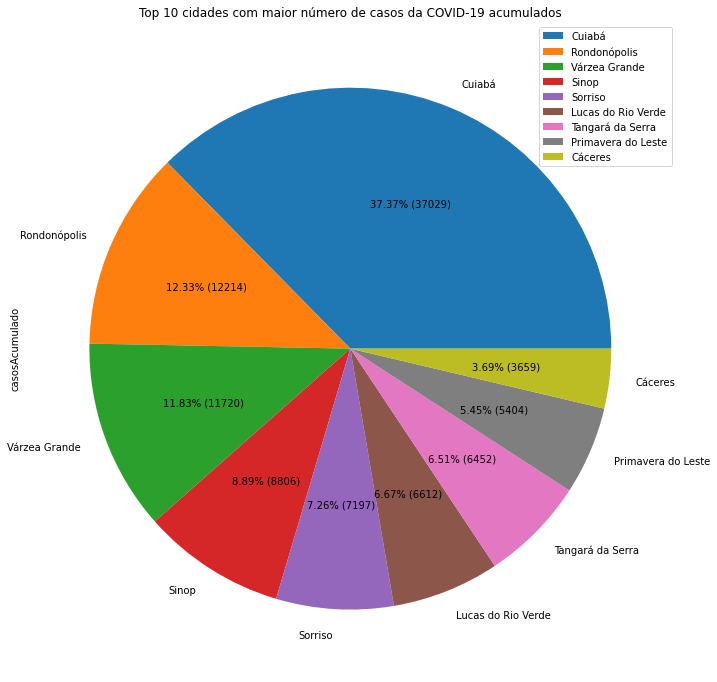

In [2]:
data = datetime.date(2020, 12, 10)

df_by_date = df[(df['data'] ==  data)].sort_values(by=['casosAcumulado'], ascending=False)
df_by_date_top_10 = df_by_date.iloc[:9]

df_by_date_top_10.plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*df_by_date_top_10['casosAcumulado'].sum()) ,figsize=(12, 12), y='casosAcumulado', labels=df_by_date_top_10['municipio'], title="Top 10 cidades com maior número de casos da COVID-19 acumulados")

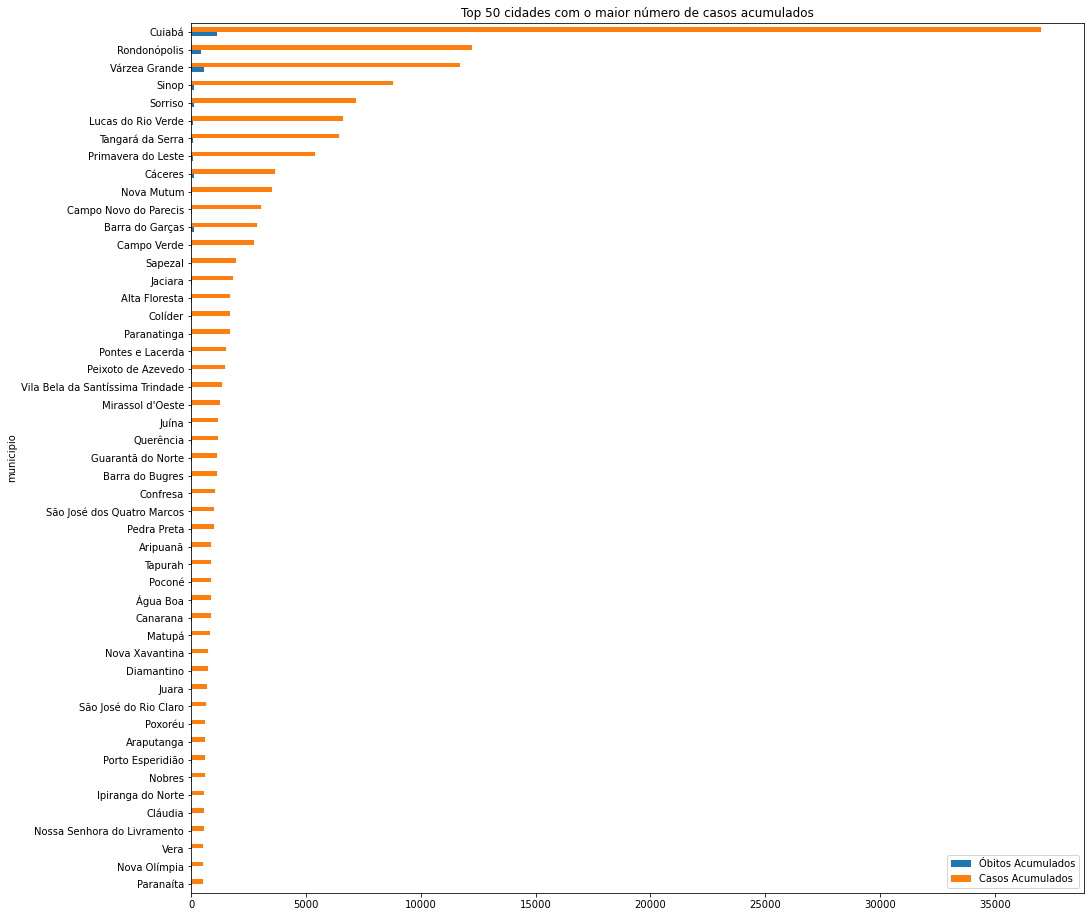

In [19]:
df_by_date_top_50 = df_by_date.iloc[:49].sort_values(by=['casosAcumulado'])
df_by_date_top_50.plot.barh(figsize=(16,16), x='municipio', y=['obitosAcumulado', 'casosAcumulado'], label=['Óbitos Acumulados', 'Casos Acumulados'], title='Top 50 cidades com o maior número de casos acumulados')

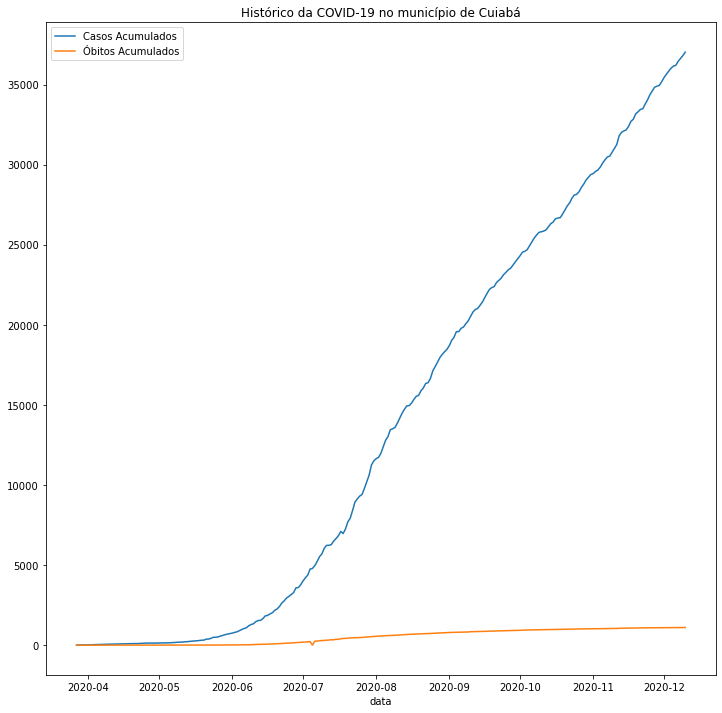

In [20]:
municipio = 'Cuiabá'

df_by_municipio = df.query(f'municipio == "{municipio}"')
df_by_municipio.plot(figsize=(12,12), x='data', y=['casosAcumulado', 'obitosAcumulado'], label=['Casos Acumulados', 'Óbitos Acumulados'], title=f'Histórico da COVID-19 no município de {municipio}')

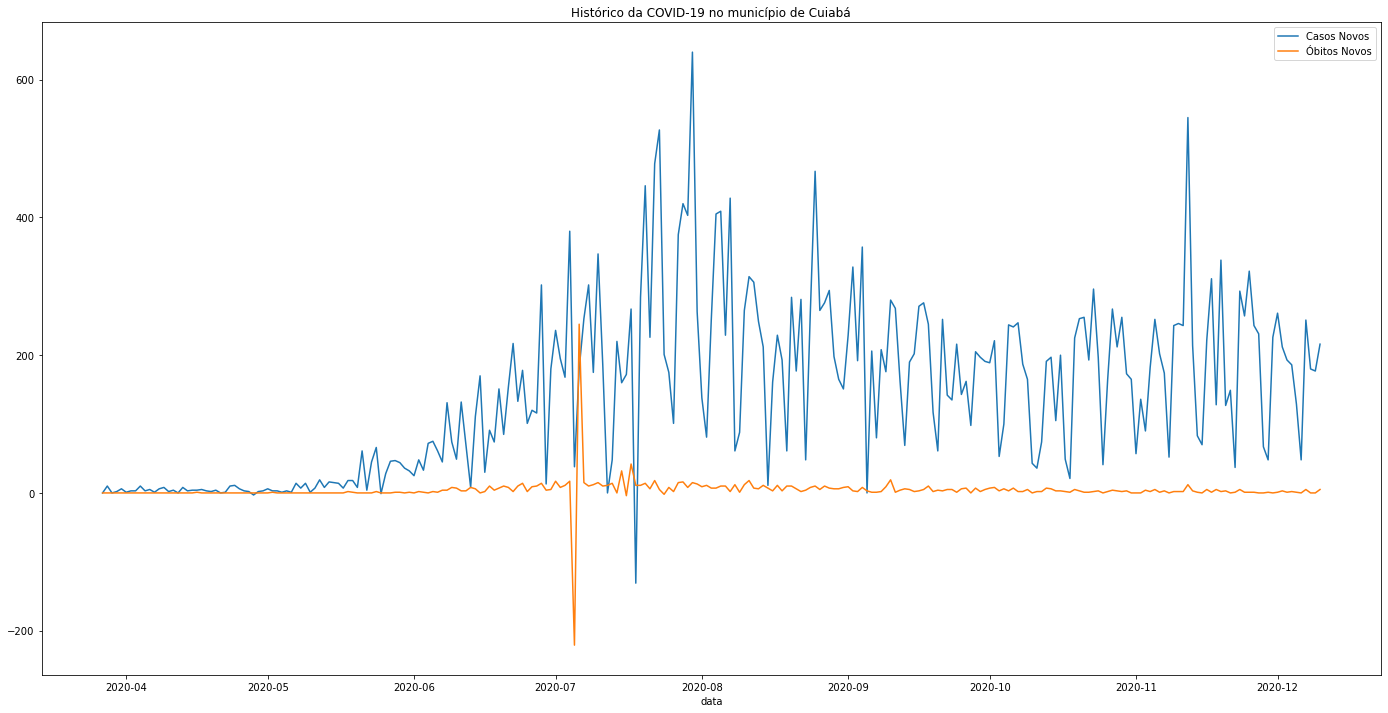

In [25]:
df_by_municipio.plot(figsize=(24,12), x='data', y=['casosNovos', 'obitosNovos'], label=['Casos Novos', 'Óbitos Novos'], title=f'Histórico da COVID-19 no município de {municipio}')

In [21]:
df_by_date_top_50[['municipio', 'casosAcumulado', 'obitosAcumulado']].sort_values(by='casosAcumulado', ascending=False).style.background_gradient(cmap='coolwarm')

,municipio,casosAcumulado,obitosAcumulado
1365279,Cuiabá,37029,1102
1384963,Rondonópolis,12214,407
1390402,Várzea Grande,11720,538
1387812,Sinop,8806,139
1388071,Sorriso,7197,112
1371754,Lucas do Rio Verde,6612,64
1388589,Tangará da Serra,6452,87
1381337,Primavera do Leste,5404,100
1360617,Cáceres,3659,128
1375639,Nova Mutum,3522,42


In [6]:
X = df_by_municipio['data'].apply(lambda x : time.mktime(x.timetuple())).values.reshape(-1,1)
y = df_by_municipio['casosAcumulado'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=0)

X_train
pd.Series(X_train.reshape(1, -1)[0])

0      1.593230e+09
1      1.604722e+09
2      1.594440e+09
3      1.588133e+09
4      1.592453e+09
           ...     
189    1.591070e+09
190    1.601870e+09
191    1.595390e+09
192    1.589342e+09
193    1.600142e+09
Length: 194, dtype: float64